# Import software libraries and load the dataset #

In [1]:
import sys                             # Read system parameters.
import shutil
import numpy as np                     # Work with multi-dimensional arrays and matrices.
from numpy.random import seed
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import sklearn                         # Perform data mining and analysis.
import tensorflow                      # Train neural networks for deep learning.
import keras                           # Provide a frontend for TensorFlow.
from keras import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- TensorFlow {}'.format(tensorflow.__version__))
print('- Keras {}\n'.format(keras.__version__))

# Load the dataset.
shutil.rmtree('/home/jovyan/.keras')
shutil.copytree('/home/jovyan/work/.keras', '/home/jovyan/.keras')
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
print('Loaded {} training records.'.format(len(X_train.data)))
print('Loaded {} test records.'.format(len(X_test.data)))

# Uncomment the following two lines to make outcomes deterministic. Supply whatever seed values you wish.
#seed(1)
#tensorflow.random.set_seed(1)

Using TensorFlow backend.


Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.16.2
- Matplotlib 3.0.3
- scikit-learn 0.20.3
- TensorFlow 2.0.0
- Keras 2.3.1

Loaded 60000 training records.
Loaded 10000 test records.


# Get acquainted with the dataset

In [2]:
print('Shape of feature space: {}\n'.format(X_train[0].shape))

print('A few examples:\n')
print(X_train[7:10])

Shape of feature space: (28, 28)

A few examples:

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ... 180   0   0]
  [  0   0   0 ...  72   0   0]
  [  0   0   0 ...  70   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...  39   1   0]
  ...
  [  0   0   0 ... 238   0   0]
  [  0   0   0 ... 131   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   7   0   0]
  ...
  [  0   0   0 ...   0   9   0]
  [  0   0   0 ...   0   3   0]
  [  0   0   0 ...   0   0   0]]]


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(10):
    print('{} ({})'.format(class_names[i], np.unique(y_train)[i]))

T-shirt/top (0)
Trouser (1)
Pullover (2)
Dress (3)
Coat (4)
Sandal (5)
Shirt (6)
Sneaker (7)
Bag (8)
Ankle boot (9)


# Visualize the data examples

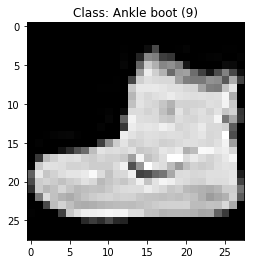

In [4]:
# Plot just first example for now.
plt.imshow(X_train[0], cmap = 'gray')
plt.title('Class: {} ({})'.format(class_names[y_train[0]], y_train[0]));

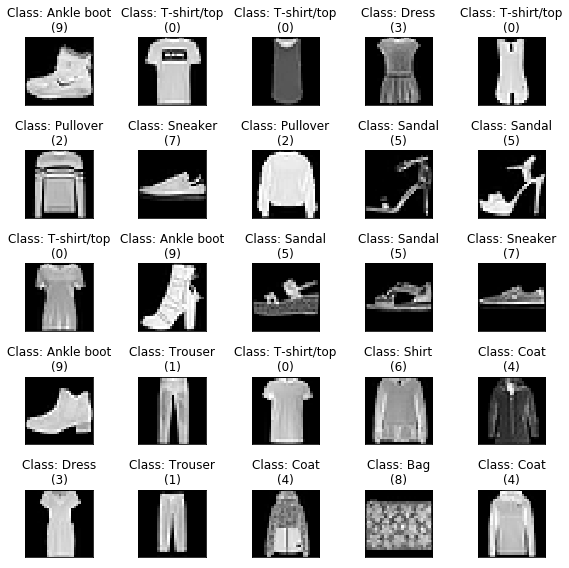

In [5]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (8, 8))

for i, ax in zip(range(25), axes.flatten()):
    ax.imshow(X_train[i,:,:], cmap = 'gray')  # Plot training example.
    ax.title.set_text('Class: {}\n({})'.format(class_names[y_train[i]], y_train[i]))

# Turn off axis ticks for readability.
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.tight_layout()

# Prepare the data for training with Keras

In [6]:
# Reshape arrays to add greyscale flag.
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

from keras.utils import to_categorical

# One-hot encode the data for each label.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('One-hot encoding for first image: {}'.format(y_train[0]))

One-hot encoding for first image: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Split the datasets

In [7]:
from sklearn.model_selection import train_test_split

# Split the training and validation datasets and their labels.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 50)

print(f'Training features:         {X_train.shape}')
print(f'Validation features:       {X_val.shape}')
print(f'Training labels:           {y_train.shape}')
print(f'Validation labels:         {y_val.shape}')

Training features:         (45000, 28, 28, 1)
Validation features:       (15000, 28, 28, 1)
Training labels:           (45000, 10)
Validation labels:         (15000, 10)


# Build the CNN structure

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers.advanced_activations import LeakyReLU

cnn = Sequential()

# Start stacking layers one-by-one.
cnn.add(Conv2D(filters = 32,
               kernel_size = (3, 3),  # First convolutional layer (32 output filters, 3x3 filter size).
               input_shape = (28, 28, 1),
               padding = 'same',
               activation = 'linear'))  # Will add leaky ReLU layer next.
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((2, 2), padding = 'same'))  # First pooling layer with 2x2 size.

cnn.add(Conv2D(64, (3, 3), padding = 'same', activation = 'linear'))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((2, 2), padding = 'same'))

cnn.add(Conv2D(128, (3, 3), padding = 'same', activation = 'linear'))
cnn.add(LeakyReLU(alpha = 0.1))                  
cnn.add(MaxPooling2D((2, 2), padding = 'same'))

cnn.add(Flatten())  # Connect convolution and dense layer.
cnn.add(Dense(10, activation = 'softmax'))  # Dense output layer with softmax activation.

print('The CNN structure has been built.')

The CNN structure has been built.


# Compile the model and examine the layers

In [9]:
cnn.compile(optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [10]:
# Install the required library.
!conda install --yes graphviz==2.40.1

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - graphviz==2.40.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    cairo-1.16.0               |    hcf35c78_1003         1.5 MB  conda-forge
    certifi-2020.12.5          |   py37h89c1867_0         143 KB  conda-forge
    expat-2.2.9                |       he1b5a44_2         191 KB  conda-forge
    fontconfig-2.13.1          |    h86ecdb6_1001

gettext-0.19.8.1     | 3.6 MB    | ##################################### | 100% 
xorg-xextproto-7.3.0 | 27 KB     | ##################################### | 100% 
graphviz-2.40.1      | 6.4 MB    | ##################################### | 100% 
pixman-0.38.0        | 594 KB    | ##################################### | 100% 
xorg-libsm-1.2.3     | 25 KB     | ##################################### | 100% 
xorg-xproto-7.0.31   | 72 KB     | ##################################### | 100% 
fontconfig-2.13.1    | 340 KB    | ##################################### | 100% 
glib-2.66.3          | 500 KB    | ##################################### | 100% 
xorg-libxt-1.1.5     | 367 KB    | ##################################### | 100% 
xorg-libxau-1.0.9    | 13 KB     | ##################################### | 100% 
xorg-libxdmcp-1.1.3  | 18 KB     | ##################################### | 100% 
libxcb-1.13          | 396 KB    | ##################################### | 100% 
Preparing transaction: done


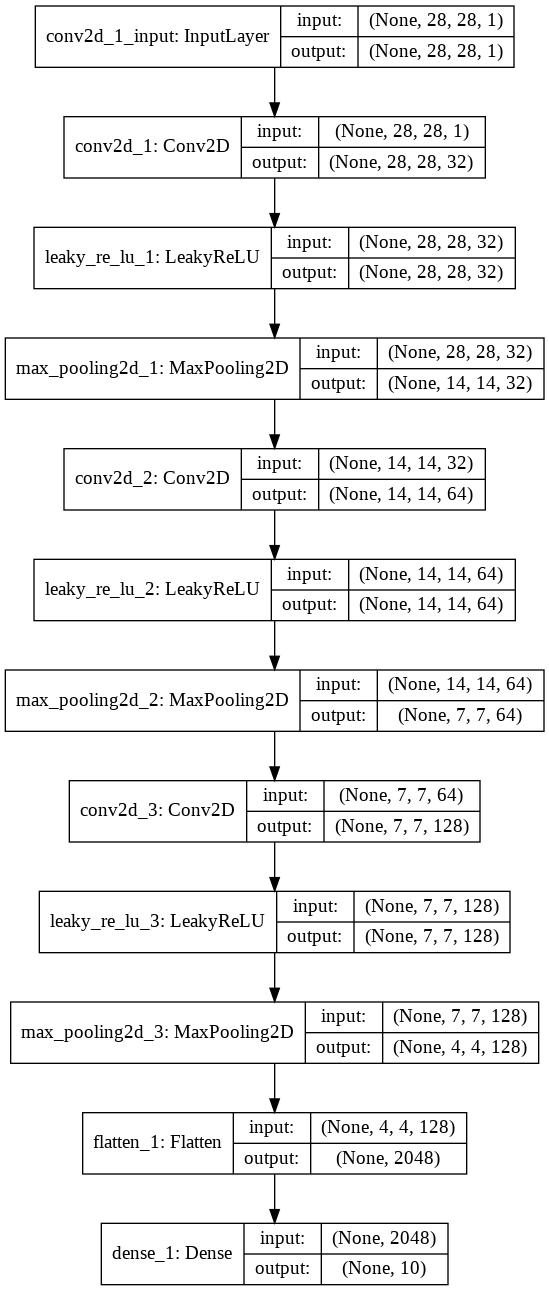

In [11]:
from keras.utils import plot_model
plot_model(cnn, show_shapes = True, to_file = 'model.png')

# Train the model

In [12]:
cnn_trained = cnn.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 1,
                      verbose = 1)

Train on 45000 samples, validate on 15000 samples
Epoch 1/1
45000/45000 [==============================] - 81s 2ms/step - loss: 0.5220 - accuracy: 0.8426 - val_loss: 0.3668 - val_accuracy: 0.8651


# Evaluate the model on the test data

In [13]:
eval_test = cnn.evaluate(X_test, y_test, verbose = 0)

print('Loss: {}'.format(round(eval_test[0], 2)))
print('Accuracy: {:.0f}%'.format(eval_test[1] * 100))

Loss: 0.4
Accuracy: 86%


# Make predictions on the test data

In [14]:
prediction = cnn.predict(X_test)
prediction = np.argmax(np.round(prediction), axis = 1)  # Extract class number from one-hot-encoded array.
actual = np.argmax(np.round(y_test), axis = 1)

print('Actual class:    {}'.format(actual[:10]))
print('Predicted class: {}'.format(prediction[:10]))

Actual class:    [9 2 1 1 6 1 4 6 5 7]
Predicted class: [9 2 1 1 6 1 0 6 5 7]


# Visualize the predictions for several examples

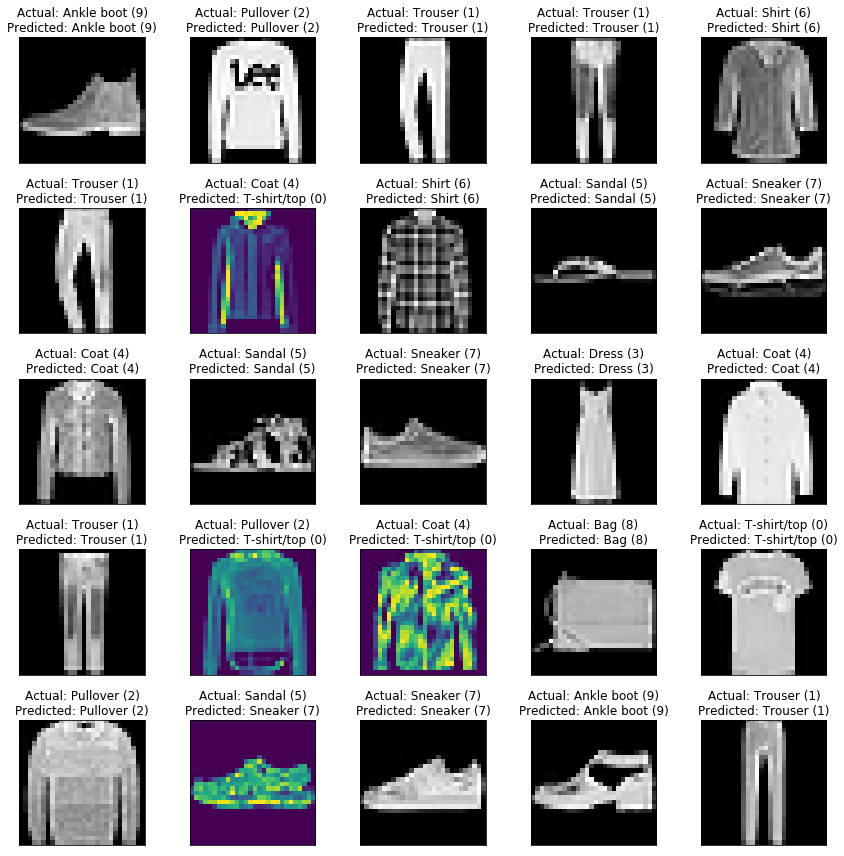

In [15]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (12, 12))

for i, ax in zip(range(25), axes.flatten()):
    
    if actual[i] == prediction[i]:
        ax.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    else:
        ax.imshow(X_test[i].reshape(28, 28))  # Highlight wrong predictions.
        
    ax.title.set_text('Actual: {} ({})\nPredicted: {} ({})'.format(class_names[actual[i]], actual[i],
                                                                   class_names[prediction[i]], prediction[i]))

# Turn off axis ticks for readability.
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.tight_layout()